<a href="https://colab.research.google.com/github/ParthPathak27/Cricket-Score-Predictor/blob/main/CricketScorePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
dataset = pd.read_csv('t20.csv')
X = dataset.iloc[:,[7,8,9,12,13]].values #Input features
y = dataset.iloc[:, 14].values #Label

In [2]:
X

array([[0.00e+00, 0.00e+00, 1.00e-01, 0.00e+00, 0.00e+00],
       [1.00e+00, 0.00e+00, 2.00e-01, 1.00e+00, 0.00e+00],
       [1.00e+00, 0.00e+00, 3.00e-01, 1.00e+00, 0.00e+00],
       ...,
       [1.07e+02, 4.00e+00, 1.41e+01, 5.00e+00, 0.00e+00],
       [1.08e+02, 4.00e+00, 1.42e+01, 5.00e+00, 1.00e+00],
       [1.12e+02, 4.00e+00, 1.43e+01, 9.00e+00, 1.00e+00]])

In [3]:
y

array([179, 179, 179, ..., 165, 165, 165])

**Features Used:**

* runs
* wickets
* overs
* striker
* non-striker
**Label Used**: total

## Splitting data into training and testing set


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


## Feature Scaling the data

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Training the dataset
* Using Linear Regression Algorithm

In [6]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression()

* Using Random Forest Regression Algorithm

In [7]:
from sklearn.ensemble import RandomForestRegressor
lin = RandomForestRegressor(n_estimators=100,max_features=None)
lin.fit(X_train,y_train)

RandomForestRegressor(max_features=None)

random forest regression gives us better accuracy.

## Testing the dataset on trained model

**R-squared value**

R-sqaured is a statistic that will give some information about the goodness of fit of a model. In regression, the R-squared coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R-squared value of 1 indicates that the regression predictions perfectly fit the data.


In [8]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

I have kept thresold as 20 for ODI matches and 10 for T-20 matches.

In [19]:
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)*100
print("R-squared value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,10))



R-squared value: 76.66997309731624
Custom accuracy: 70.77323717948718


## Testing with a custom input

In [10]:
import numpy as np
new_prediction = lin.predict(sc.transform(np.array([[100,10,15,50,25]])))
print("Prediction score:" , new_prediction)

Prediction score: [141.28]


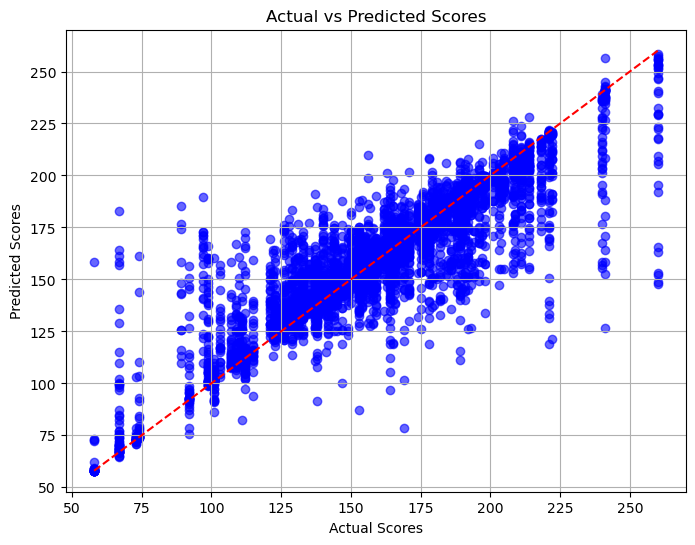

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Ideal line
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Scores")
plt.grid(True)
plt.show()


In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# Define a bucketing function
def bucket(score):
    if score < 120:
        return 0  # Low
    elif score < 180:
        return 1  # Medium
    else:
        return 2  # High

# Convert regression outputs into classes
y_test_binned = np.array([bucket(score) for score in y_test])
y_pred_binned = np.array([bucket(score) for score in y_pred])

# Confusion matrix
cm = confusion_matrix(y_test_binned, y_pred_binned)
print("Confusion Matrix:\n", cm)

# Accuracy
accuracy = accuracy_score(y_test_binned, y_pred_binned)
print("\nAccuracy:", accuracy)

# Classification Report (includes precision, recall, F1)
print("\nClassification Report:")
print(classification_report(y_test_binned, y_pred_binned, target_names=["Low", "Medium", "High"]))


Confusion Matrix:
 [[ 414  143    3]
 [  25 2955  116]
 [   3  312 1021]]

Accuracy: 0.8794070512820513

Classification Report:
              precision    recall  f1-score   support

         Low       0.94      0.74      0.83       560
      Medium       0.87      0.95      0.91      3096
        High       0.90      0.76      0.82      1336

    accuracy                           0.88      4992
   macro avg       0.90      0.82      0.85      4992
weighted avg       0.88      0.88      0.88      4992



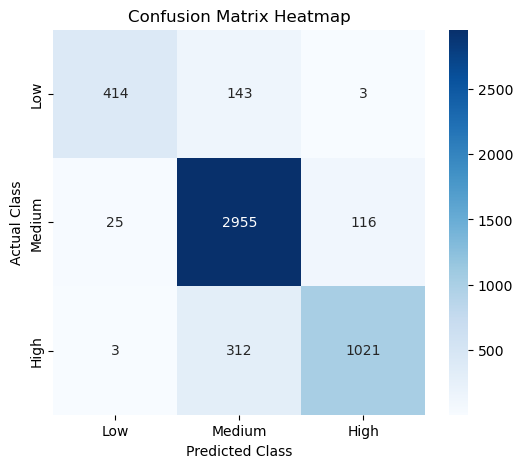

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix Heatmap")
plt.show()
